In [1]:
import pandas as pd
import numpy as np

# Read n rows from the embedded data
df = pd.read_csv('../../data/articles_avg_token.csv')
label_vectors = pd.read_csv('../../data/categories_avg_token.csv')
synonym_label_vectors = pd.read_csv('../../data/categories_avg_synonym.csv')

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [2]:
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.metrics import accuracy_score as acc_score


pred = np.argmax(cs(X, label_vectors), axis = 1)
print("Accuracy with original labels:",acc_score(y,pred))

synonym_pred = np.argmax(cs(X, synonym_label_vectors), axis = 1)
print("Accuracy with labels including synonyms:",acc_score(y, synonym_pred))

Accuracy with original labels: 0.6553333333333333
Accuracy with labels including synonyms: 0.5669166666666666


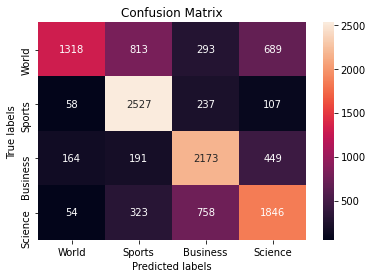

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.metrics import accuracy_score as acc_score, confusion_matrix as cm

labels = ["World","Sports","Business","Science"]

ax= plt.subplot()
sns.heatmap(cm(y, pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

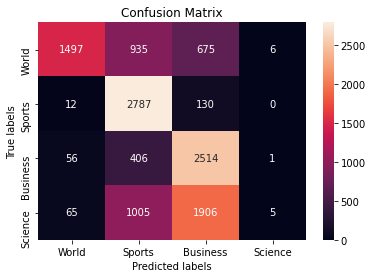

In [4]:
ax= plt.subplot()
sns.heatmap(cm(y, synonym_pred), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);